# Chapter 9 - Plotting and Visualization

Making informative visualizations (sometimes called plots) is one of the most impor‐
tant tasks in data analysis. It may be a part of the exploratory process—for example,
to help identify outliers or needed data transformations, or as a way of generating
ideas for models. For others, building an interactive visualization for the web may be
the end goal. Python has many add-on libraries for making static or dynamic visuali‐
zations, but I’ll be mainly focused on matplotlib and libraries that build on top of it.

matplotlib is a desktop plotting package designed for creating (mostly twodimensional) publication-quality plots. The project was started by John Hunter in
2002 to enable a MATLAB-like plotting interface in Python. The matplotlib and IPy‐
thon communities have collaborated to simplify interactive plotting from the IPython
shell (and now, Jupyter notebook). matplotlib supports various GUI backends on all
operating systems and additionally can export visualizations to all of the common
vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). With the
exception of a few diagrams, nearly all of the graphics in this book were produced
using matplotlib.

Over time, matplotlib has spawned a number of add-on toolkits for data visualization
that use matplotlib for their underlying plotting. One of these is seaborn, which we
explore later in this chapter.

*__The simplest way to follow the code examples in the chapter is to use interactive plotting in the Jupyter notebook. To set this up, execute the following statement in a
Jupyter notebook:__*

In [1]:
%matplotlib notebook

## 9.1 A Brief matplotlib API Primer

With matplotlib, we use the following import convention:

In [2]:
import matplotlib.pyplot as plt

After running %matplotlib notebook in Jupyter (or simply %matplotlib in IPy‐
thon), we can try creating a simple plot.

In [3]:
import numpy as np

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


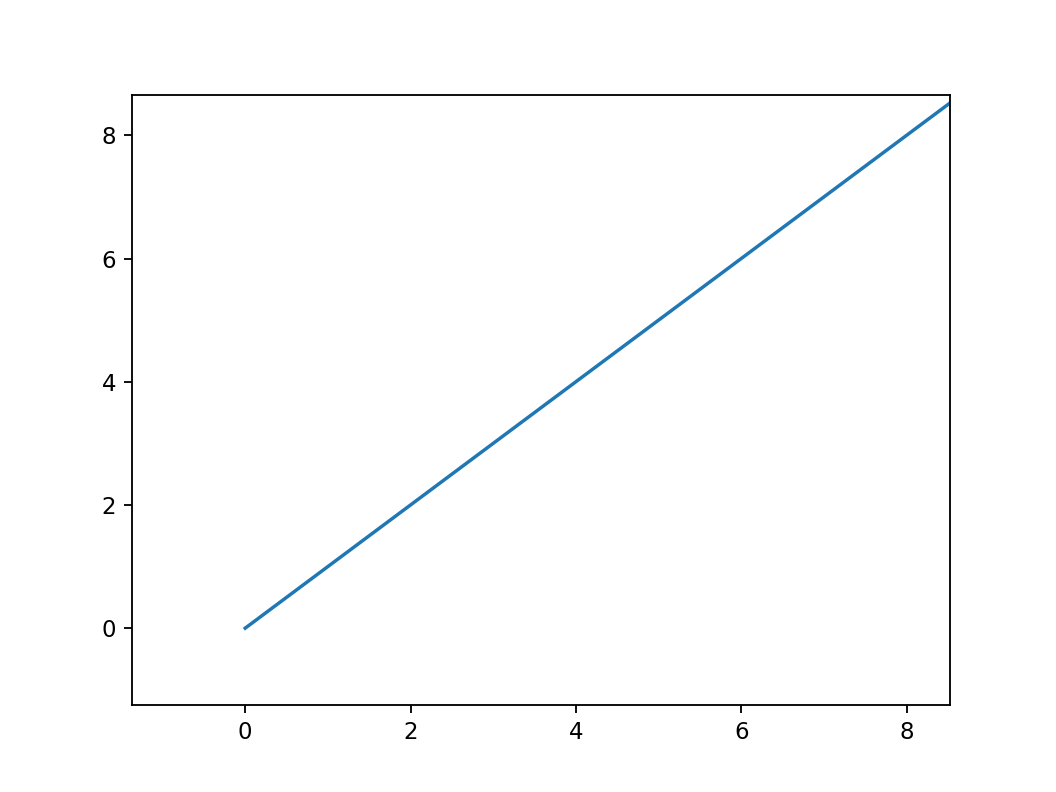

In [6]:
plt.plot(data)

While libraries like seaborn and pandas’s built-in plotting functions will deal with
many of the mundane details of making plots, should you wish to customize them
beyond the function options provided, you will need to learn a bit about the matplot‐
lib API.

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure:

<IPython.core.display.Javascript object>


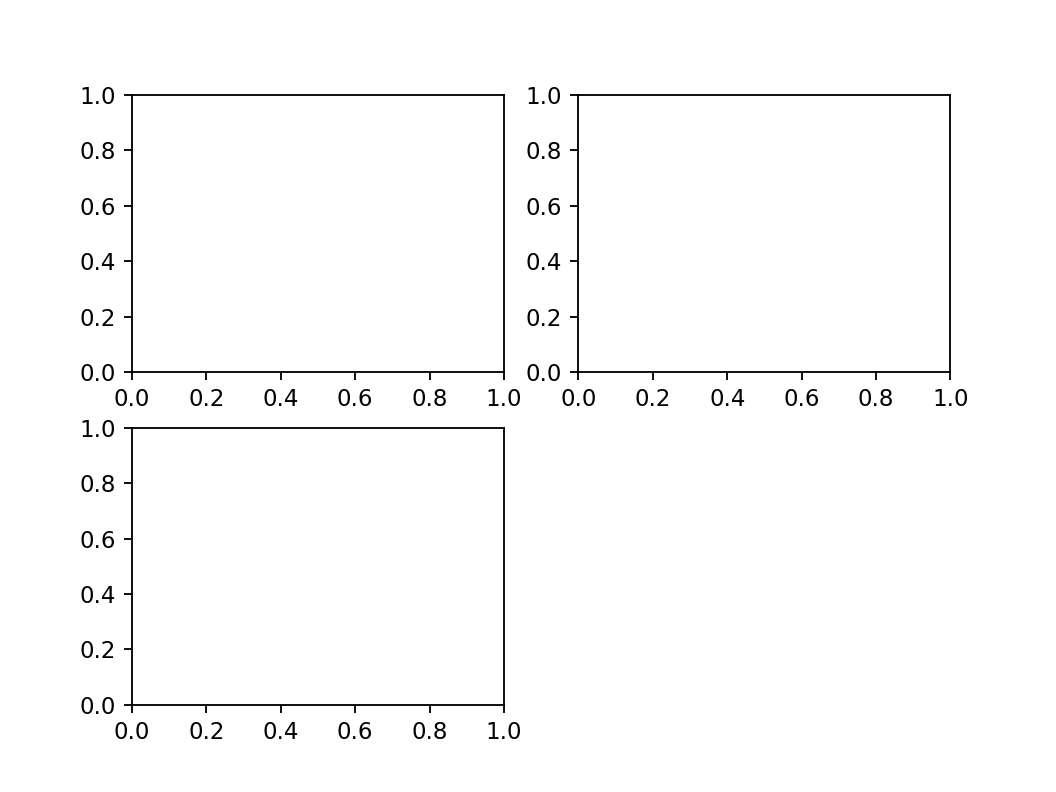

In [7]:
fig = plt.figure()

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown
until we use a few more commands. plt.figure has a number of options; notably,
figsize will guarantee the figure has a certain size and aspect ratio if saved to disk.

You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot:

In [8]:
ax1 = fig.add_subplot(2,2,1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
selecting the first of four subplots (numbered from 1).

In [9]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Here we run all of these commands in the same cell:

<IPython.core.display.Javascript object>


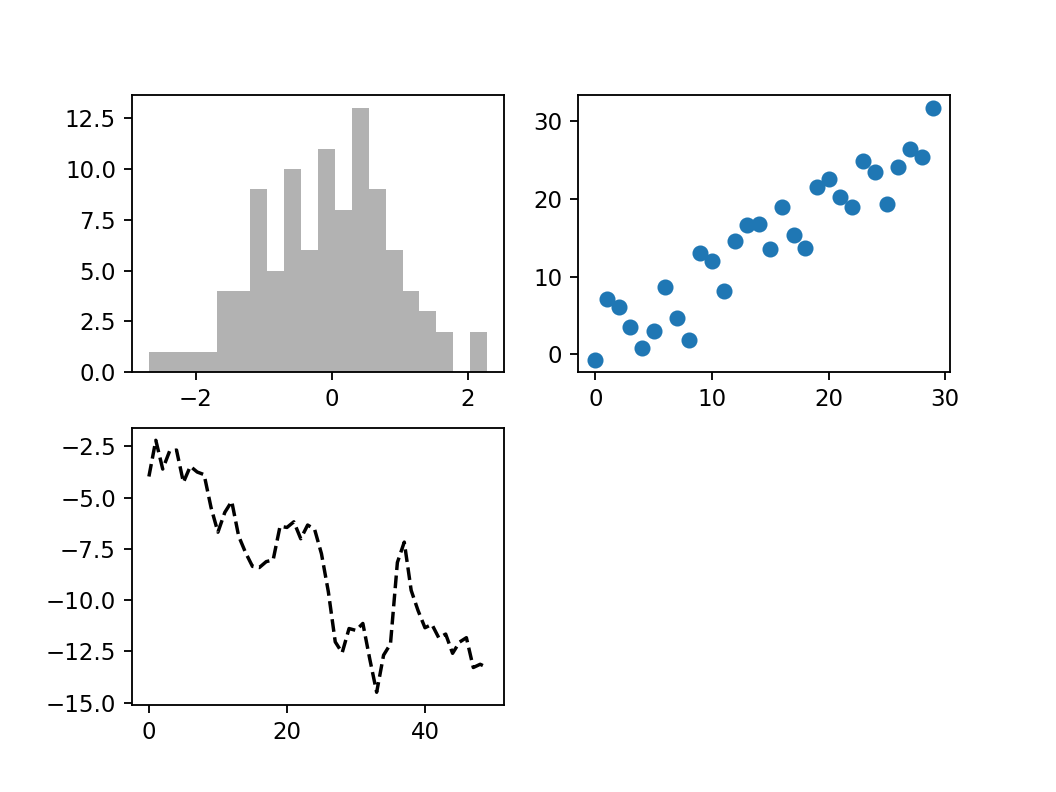

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

*__When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), mat‐
plotlib draws on the last figure and subplot used__* (creating one if necessary), thus hiding the figure and subplot creation.

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The
objects returned by fig.add_subplot here are AxesSubplot objects, on which you
can directly plot on the other empty subplots by calling each one’s instance method

In [12]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [13]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

You can find a comprehensive catalog of plot types in the matplotlib documentation.

Creating a figure with a grid of subplots is a very common task, so matplotlib
includes a convenience method, plt.subplots, that creates a new figure and returns
a NumPy array containing the created subplot objects:

<IPython.core.display.Javascript object>


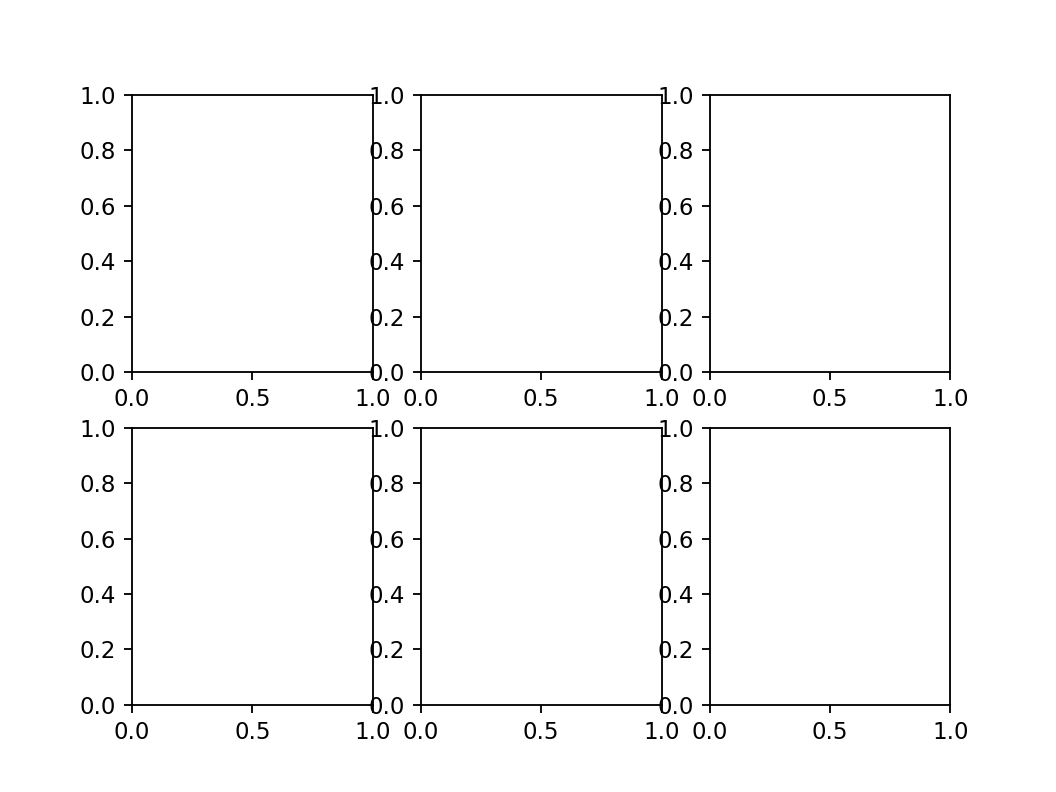

In [14]:
fig, axes = plt.subplots(2,3)

In [15]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9699E5438>,
      dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional
array; for example, axes[0, 1]. *__You can also indicate that subplots should have the
same x- or y-axis using sharex and sharey, respectively. This is especially useful
when you’re comparing data on the same scale__*; otherwise, matplotlib autoscales plot
limits independently. See Table 9-1 for more on this method.

![](pyplot.jpg)

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. You can
change the spacing using the subplots_adjust method on Figure objects, also avail‐
able as a top-level function:

    subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
wspace and hspace controls the percent of the figure width and figure height, respec‐
tively, to use as spacing between subplots.

<IPython.core.display.Javascript object>


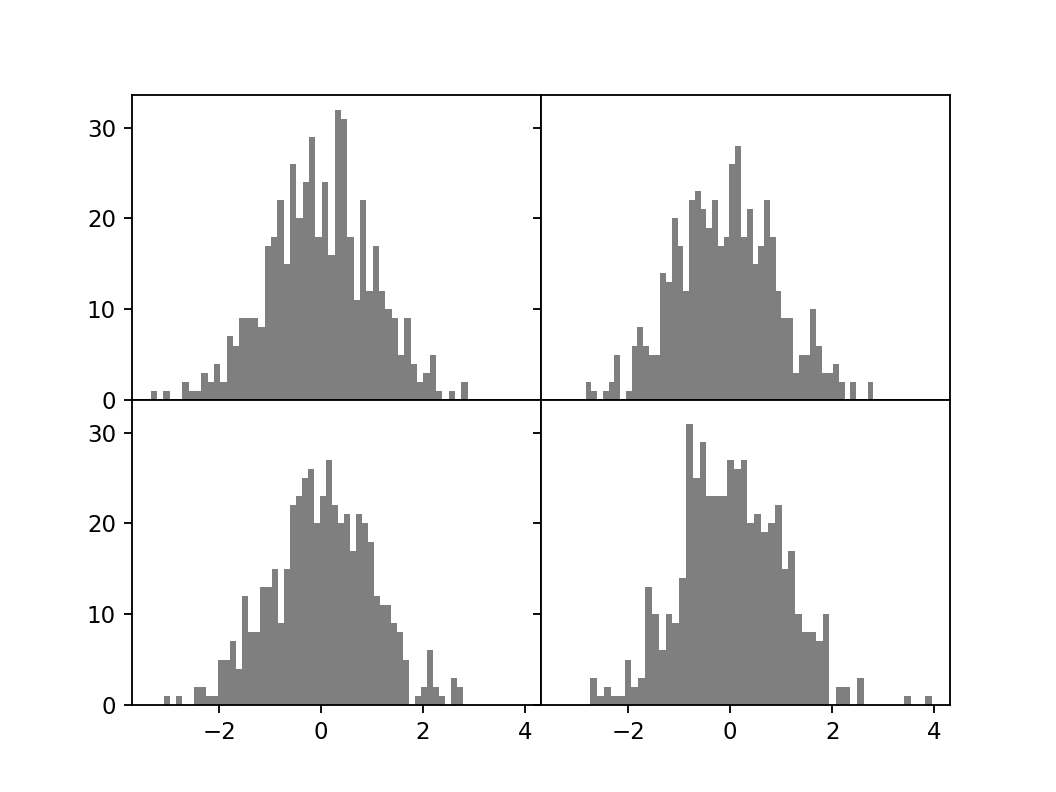

In [5]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

You may notice that the axis labels overlap. matplotlib doesn’t check whether the
labels overlap, so in a case like this you would need to fix the labels yourself by speci‐
fying explicit tick locations and tick labels (we’ll look at how to do this in the following sections).

### Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a
string abbreviation indicating color and line style. For example, to plot x versus y
with green dashes, you would execute:

    ax.plot(x, y, 'g--')
    
This way of specifying both color and line style in a string is provided as a conve‐
nience; in practice if you were creating plots programmatically you might prefer not
to have to munge strings together to create plots with the desired style. The same plot
could also have been expressed more explicitly as:

    ax.plot(x, y, linestyle='--', color='g')
    
There are a number of color abbreviations provided for commonly used colors, but
you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').
You can see the full set of line styles by looking at the docstring for plot (use plot? in
IPython or Jupyter).

Line plots can additionally have markers to highlight the actual data points. Since
matplotlib creates a continuous line plot, interpolating between points, it can occa‐
sionally be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style

In [6]:
from numpy.random import randn

<IPython.core.display.Javascript object>


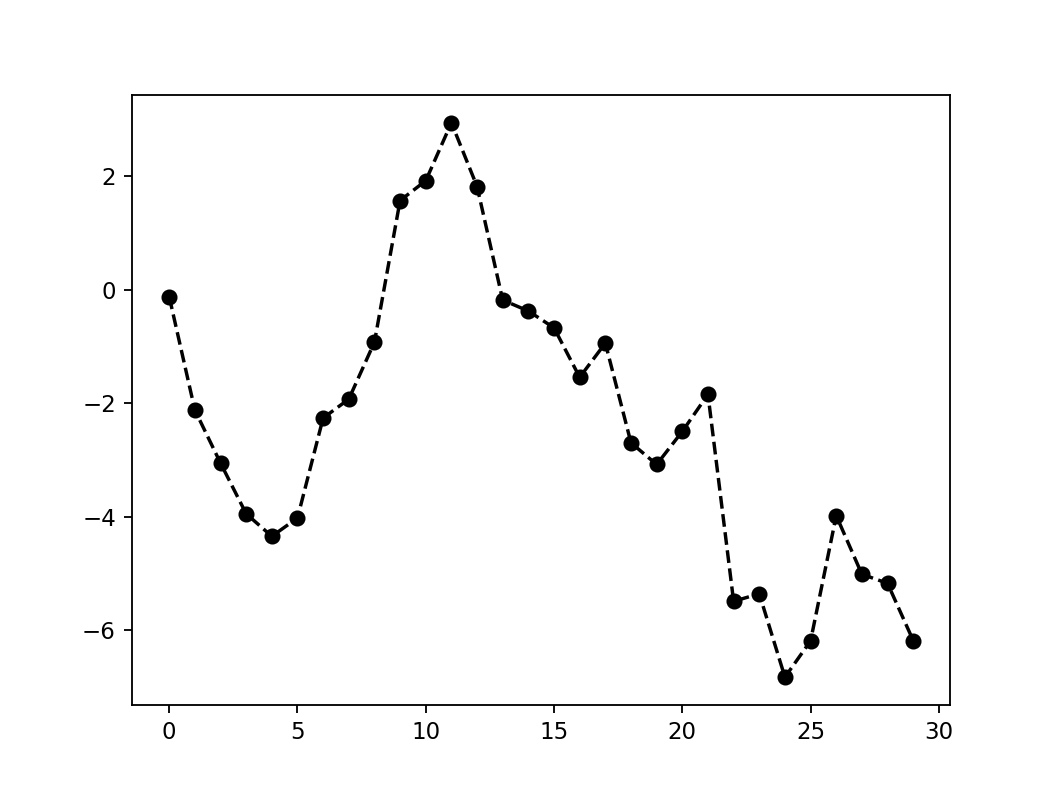

In [7]:
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

<IPython.core.display.Javascript object>


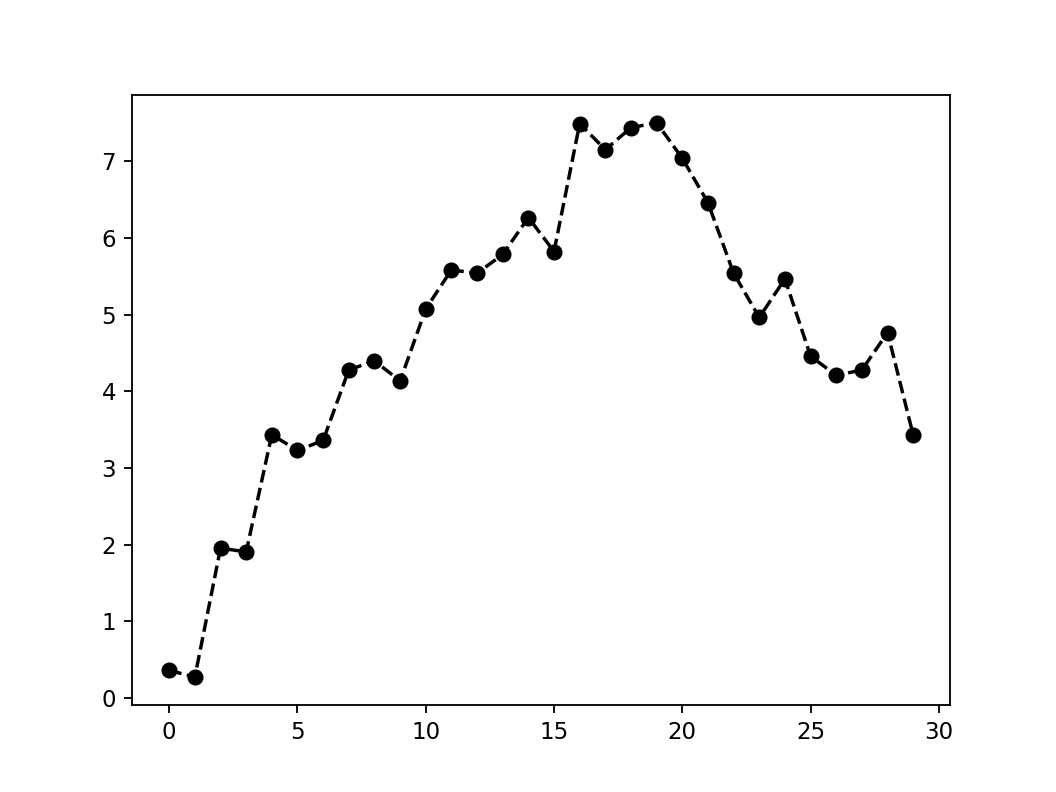

In [8]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are linearly interpolated by
default. This can be altered with the drawstyle option.

In [9]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


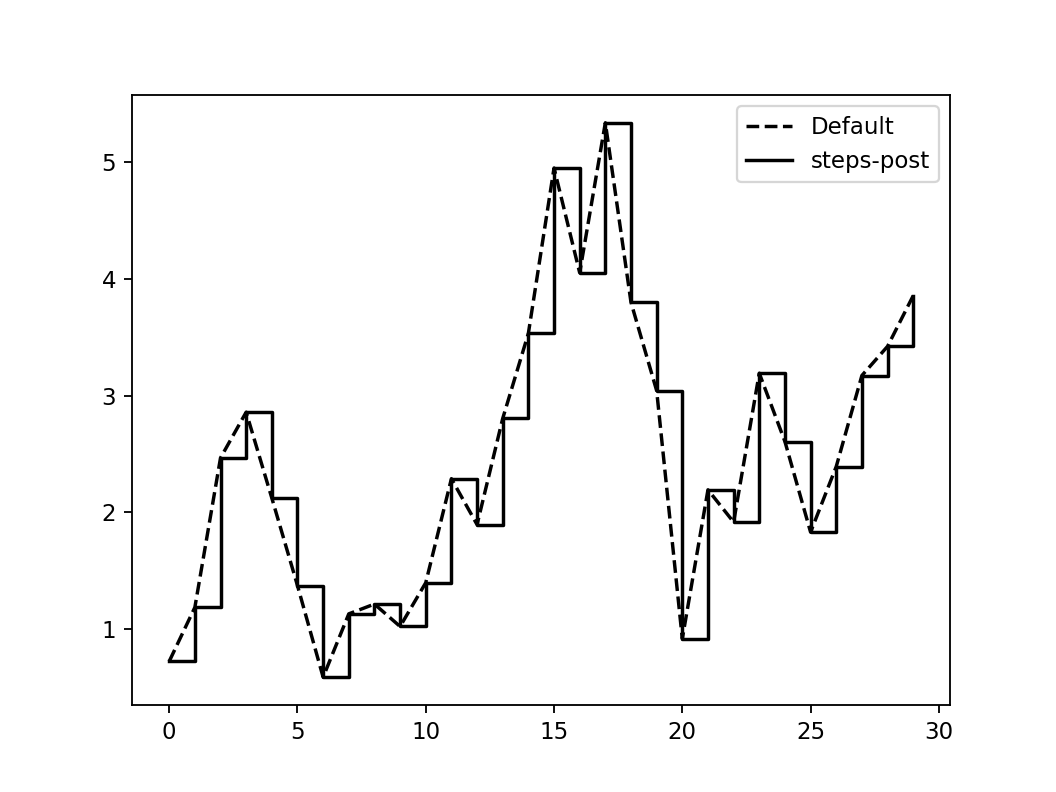

In [11]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')

You may notice output like <matplotlib.lines.Line2D at ...> when you run this.
matplotlib returns objects that reference the plot subcomponent that was just added.
A lot of the time you can safely ignore this output. Here, since we passed the label
arguments to plot, we are able to create a plot legend to identify each line using
plt.legend.

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented
native matplotlib API.

The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

• Called with no arguments returns the current parameter value (e.g., plt.xlim()
returns the current x-axis plotting range)

• Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets
the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of
them corresponds to two methods on the subplot object itself; in the case of xlim
these are ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods
myself in the interest of being explicit (and especially when working with multiple
subplots), but you can certainly use whichever you find more convenient.

#### Setting the title, axis labels, ticks, and ticklabels

To illustrate customizing the axes, I’ll create a simple figure and plot of a random
walk.

<IPython.core.display.Javascript object>


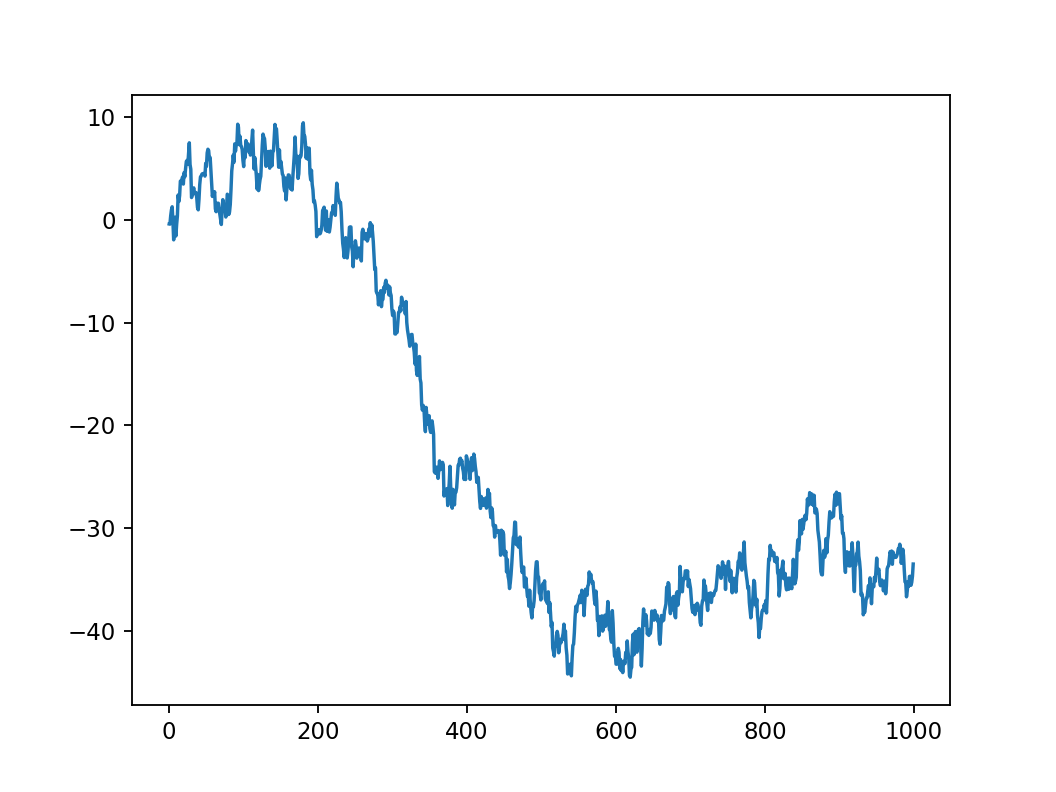

In [12]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels
using set_xticklabels:

<IPython.core.display.Javascript object>


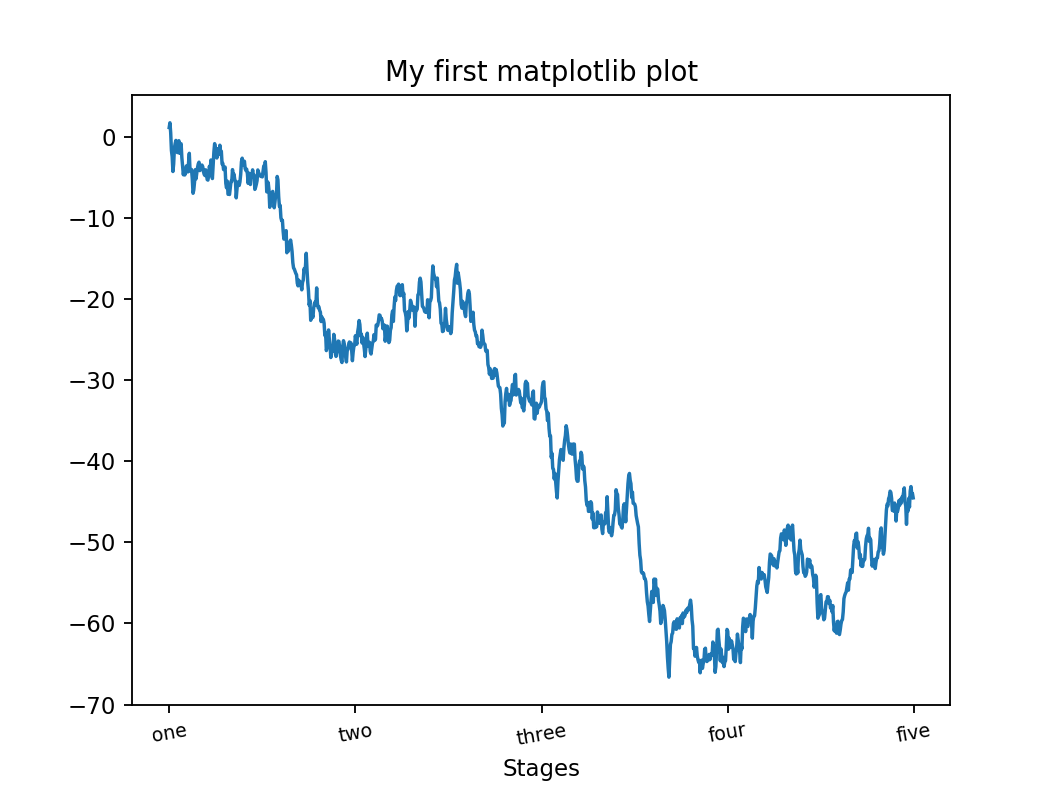

In [17]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=10, fontsize='small')

The rotation option sets the x tick labels at a 30-degree rotation. Lastly, set_xlabel
gives a name to the x-axis and set_title the subplot title.

In [18]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 34.36597189902759, 'Stages')

Modifying the y-axis consists of the same process, substituting y for x in the above.
The axes class has a set method that allows batch setting of plot properties. From the
prior example, we could also have written:

    props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
    }
    ax.set(**props)

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the label argument when adding each piece
of the plot:

In [4]:
from numpy.random import randn

<IPython.core.display.Javascript object>


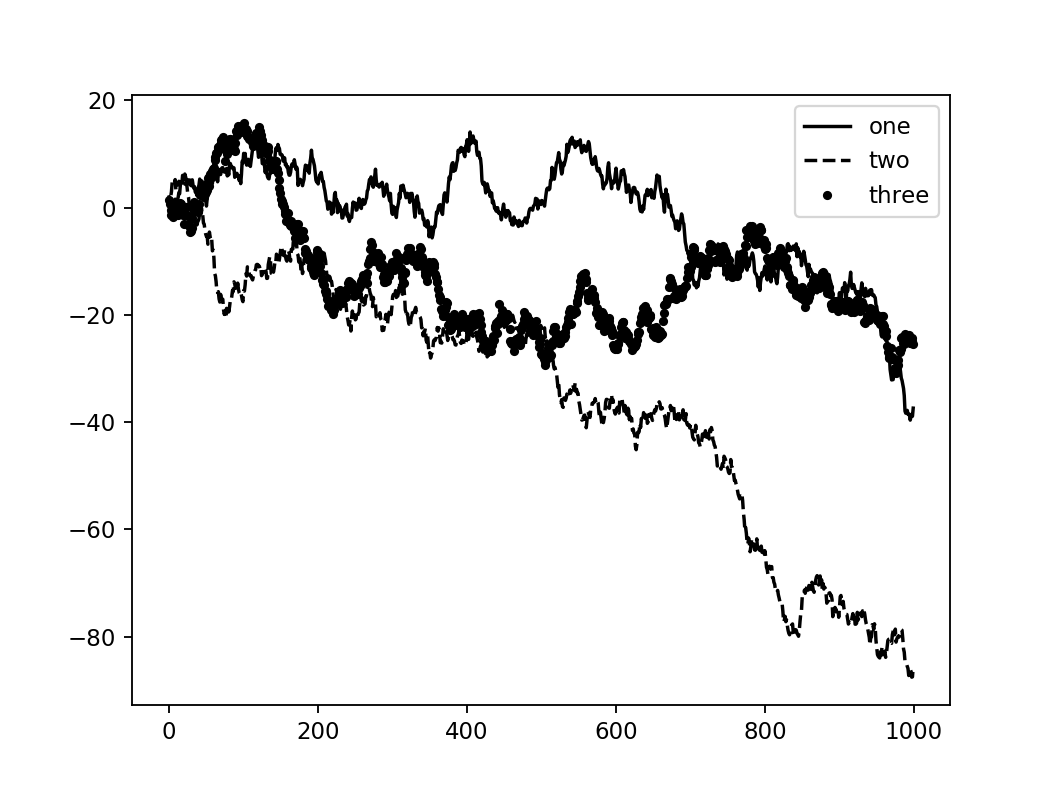

In [20]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically create a legend.

In [21]:
ax.legend(loc='best')

The legend method has several other choices for the location loc argument. See the
docstring (with ax.legend?) for more information.

The loc tells matplotlib where to place the plot. If you aren’t picky, 'best' is a good
option, as it will choose a location that is most out of the way. To exclude one or more
elements from the legend, pass no label or label='_nolegend_'.

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annota‐
tions, which could consist of text, arrows, or other shapes. You can add annotations
and text using the text, arrow, and annotate functions. text draws text at given
coordinates (x, y) on the plot with optional custom styling:

    ax.text(x, y, 'Hello world!',
    family='monospace', fontsize=10)
    
Annotations can draw both text and arrows arranged appropriately. As an example,
let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008–2009 financial crisis.
You can most easily reproduce this code example in a single cell in a Jupyter notebook.

Annotations can draw both text and arrows arranged appropriately. As an example,
let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008–2009 financial crisis.
You can most easily reproduce this code example in a single cell in a Jupyter note‐
book.

In [5]:
from datetime import datetime
import pandas as pd

<IPython.core.display.Javascript object>


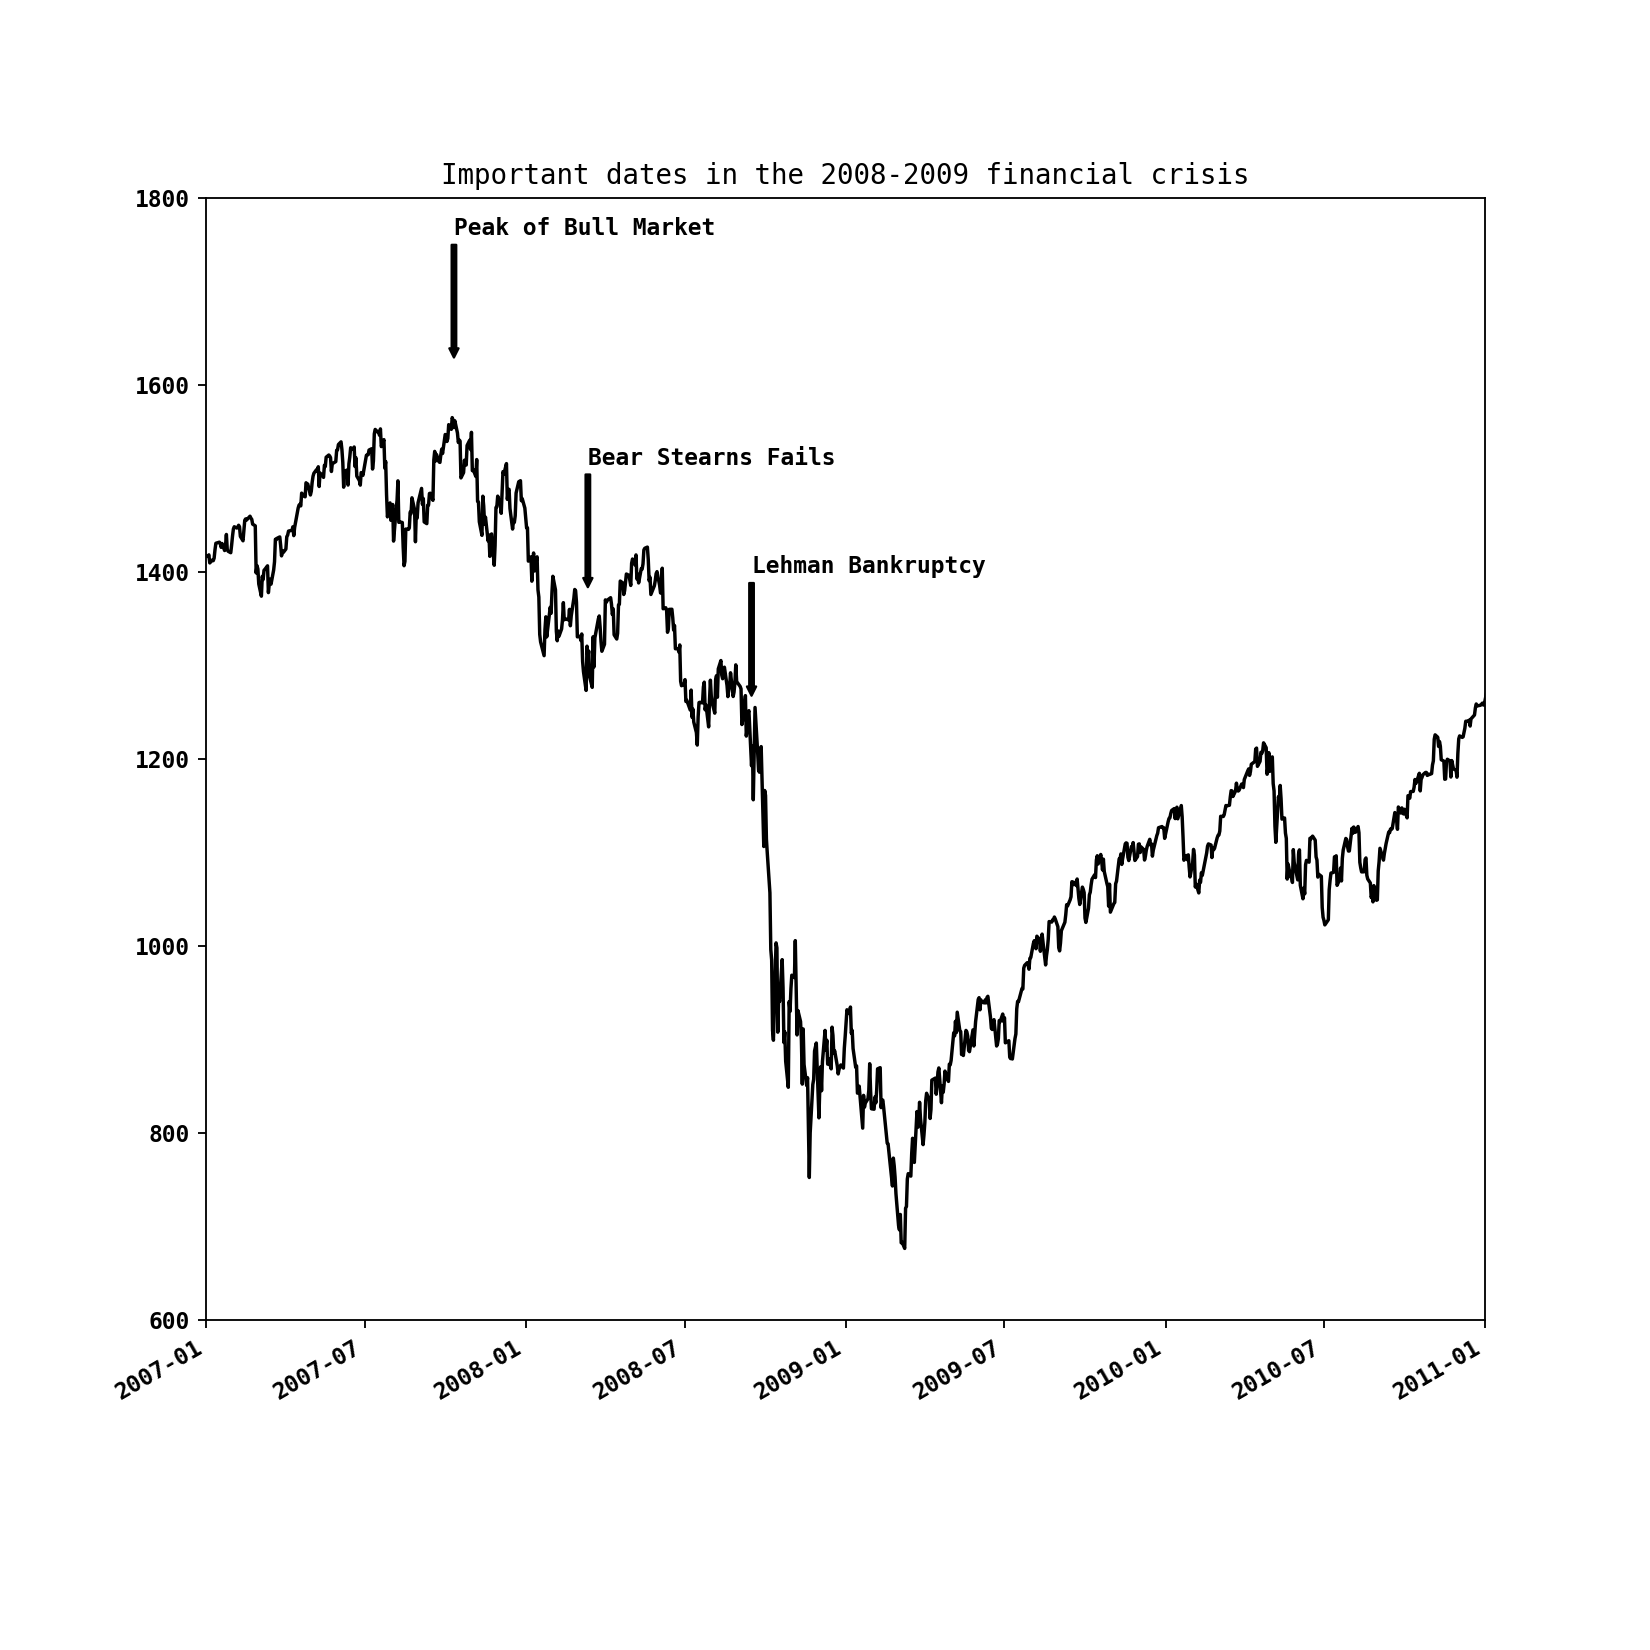

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [33]:
data = pd.read_csv('examples/spx.csv')
data.head()

,Unnamed: 0,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [67]:
data = pd.read_csv('examples/spx.csv', index_col=0)
data.head()

,SPX
1990-02-01 00:00:00,328.79
1990-02-02 00:00:00,330.92
1990-02-05 00:00:00,331.85
1990-02-06 00:00:00,329.66
1990-02-07 00:00:00,333.75


In [68]:
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [69]:
spx = data['SPX']
spx[:5]

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [70]:
spx.plot(ax=ax, style='k-')

In [71]:
crisis_data = [(datetime(2007,10,11), 'Peak of Bull Market'),
               (datetime(2008,3,12), 'Bear Stearns Fails'),
               (datetime(2008,9,15), 'Lehman Bankruptcy')]
type(crisis_data)

list

In [72]:
for date,label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75), xytext=(date, spx.asof(date)+225),
               arrowprops=dict(facecolor='black',headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

In [73]:
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1, 'Important dates in the 2008-2009 financial crisis')

There are a couple of important points to highlight in this plot: the ax.annotate
method can draw labels at the indicated x and y coordinates. We use the set_xlim
and set_ylim methods to manually set the start and end boundaries for the plot
rather than using matplotlib’s default. Lastly, ax.set_title adds a main title to the
plot.

See the online matplotlib gallery for many more annotation examples to learn from.

Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches. Some of these, like Rectangle and Circle, are
found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

To add a shape to a plot, you create the patch object shp and add it to a subplot by
calling ax.add_patch(shp) .

<IPython.core.display.Javascript object>


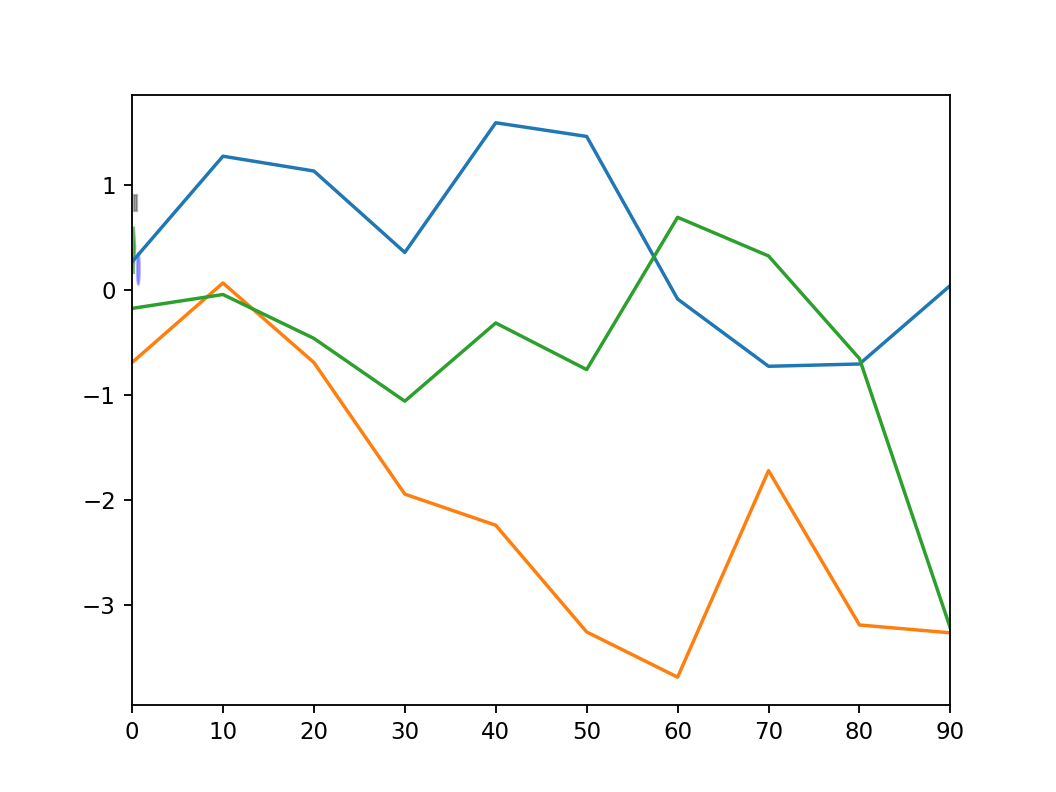

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

If you look at the implementation of many familiar plot types, you will see that they
are assembled from patches.

### Saving Plots to File

You can save the active figure to file using plt.savefig. This method is equivalent to
the figure object’s savefig instance method. For example, to save an SVG version of a
figure, you need only type:

In [49]:
plt.savefig('figpath.svg')

The file type is inferred from the file extension. So if you used .pdf instead, you
would get a PDF. There are a couple of important options that I use frequently for
publishing graphics: *__dpi, which controls the dots-per-inch resolution, and
bbox_inches, which can trim the whitespace around the actual figure__*. To get the
same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do:

    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
    
savefig doesn’t have to write to disk; it can also write to any file-like object, such as a
BytesIO:

    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()

See Table 9-2 for a list of some other options for savefig.

![](savefig.jpg)

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primar‐
ily toward preparing figures for publication. Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the
configuration programmatically from Python is to use the rc method; for example, to
set the global default figure size to be 10 × 10, you could enter:

In [50]:
plt.rc('figure', figsize=(10,10))

The first argument to rc is the component you wish to customize, such as 'figure',
'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. An easy way to write
down the options in your program is as a dict:

In [52]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

ValueError: Key font.size: Could not convert "small" to float

For more extensive customization and to see a list of all the options, matplotlib comes
with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you cus‐
tomize this file and place it in your home directory titled .matplotlibrc, it will be
loaded each time you use matplotlib.

As we’ll see in the next section, the seaborn package has several built-in plot themes
or styles that use matplotlib’s configuration system internally.

## 9.2 Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. You assemble a plot from its base compo‐
nents: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), leg‐
end, title, tick labels, and other annotations.

In pandas we may have multiple columns of data, along with row and column labels.
pandas itself has built-in methods that simplify creating visualizations from Data‐
Frame and Series objects. Another library is seaborn, a statistical graphics library cre‐
ated by Michael Waskom. Seaborn simplifies creating many common visualization
types.

Importing seaborn modifies the default matplotlib color schemes
and plot styles to improve readability and aesthetics. Even if you do
not use the seaborn API, you may prefer to import seaborn as a
simple way to improve the visual aesthetics of general matplotlib
plots.

### Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types. By
default, plot() makes line plots.

<IPython.core.display.Javascript object>


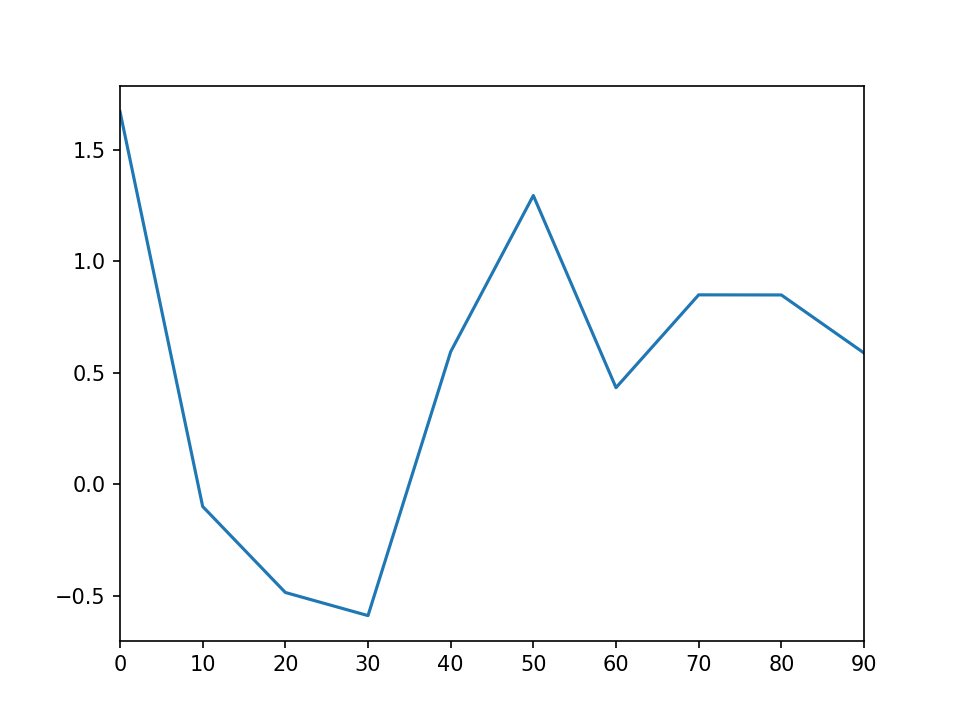

In [9]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you
can disable this by passing use_index=False. The x-axis ticks and limits can be
adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim. See Table 9-3 for a full listing of plot options. I’ll comment on a few more of
them throughout this section and leave the rest to you to explore.
Most of pandas’s plotting methods accept an optional ax parameter, which can be a
matplotlib subplot object. This gives you more flexible placement of subplots in a grid
layout.

DataFrame’s plot method plots each of its columns as a different line on the same
subplot, creating a legend automatically.

In [12]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,1.696311,-2.403510,0.581616,-1.529062
10,1.990869,-1.823370,0.702066,-0.921550
20,3.943770,-2.609796,-0.075501,-2.262631
30,3.983495,-2.222329,-2.644696,-0.870622
40,3.686920,-2.650565,-2.323979,-2.218240
50,2.611464,-3.408867,-3.509392,-1.156842
60,3.057131,-3.829535,-3.109469,-0.355800
70,3.112746,-4.640321,-2.123744,1.008006
80,3.670098,-5.576325,-2.895793,1.892631
90,4.306164,-6.106522,-4.202384,1.235081


<IPython.core.display.Javascript object>


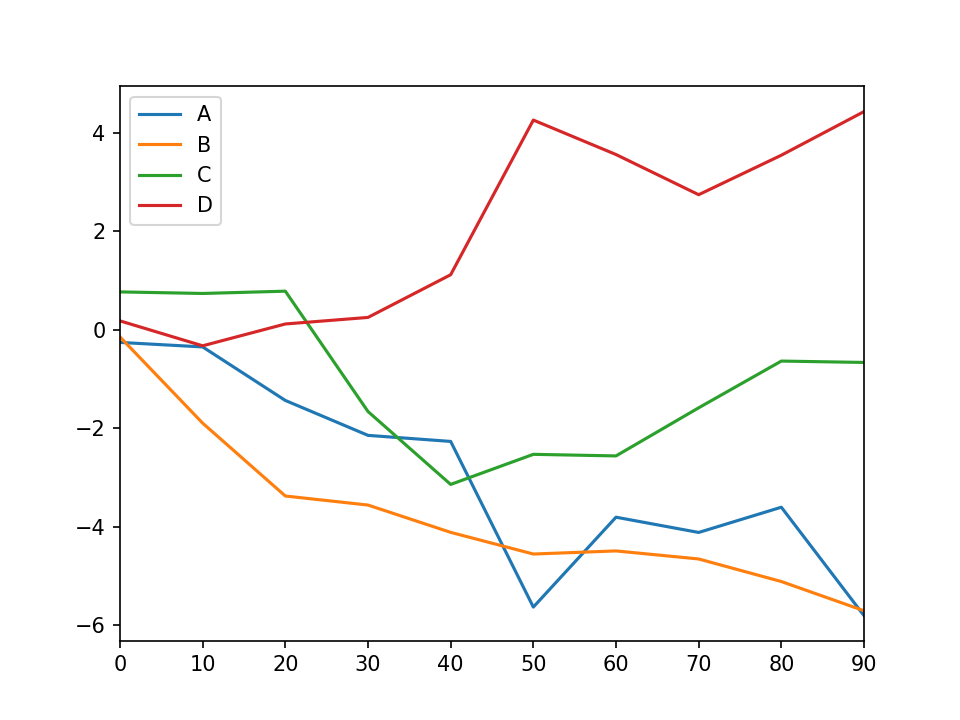

In [11]:
df.plot()

The plot attribute contains a “family” of methods for different plot types. For exam‐
ple, df.plot() is equivalent to df.plot.line(). We’ll explore some of these methods
next.

![](series_plot.jpg)

DataFrame has a number of options allowing some flexibility with how the columns
are handled; for example, whether to plot them all on the same subplot or to create
separate subplots. See Table 9-4 for more on these.

![](df_plot.jpg)

### Bar Plots

The plot.bar() and plot.barh() make vertical and horizontal bar plots, respec‐
tively. In this case, the Series or DataFrame index will be used as the x (bar) or y
(barh) ticks.

<IPython.core.display.Javascript object>


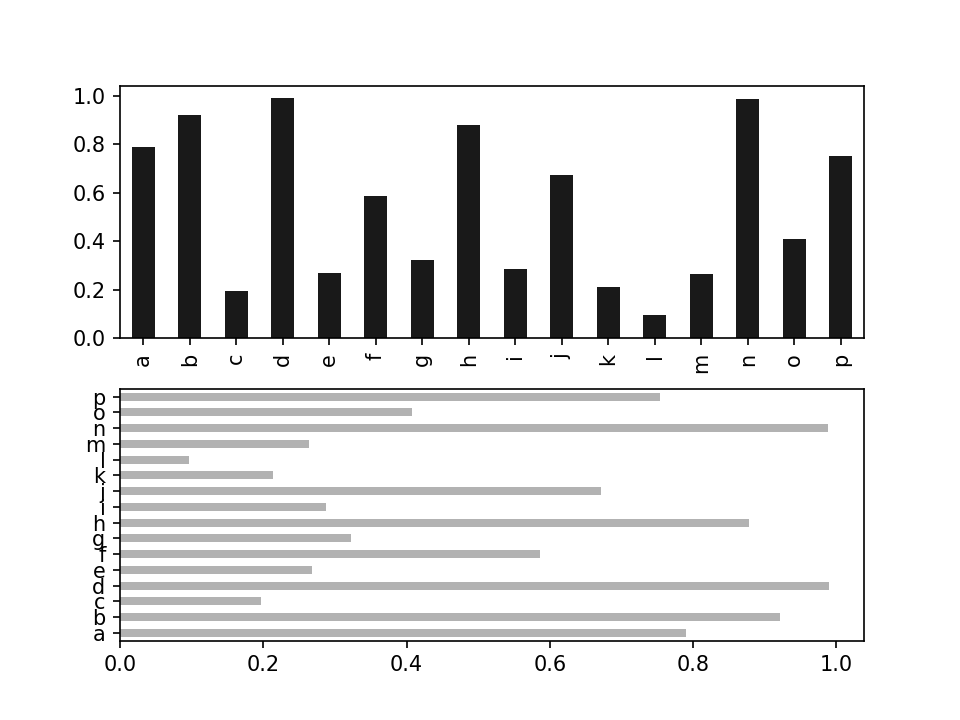

In [15]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.9)
data.plot.barh(ax=axes[1], color='k', alpha=0.3)

The options color='k' and alpha=0.7 set the color of the plots to black and use partial transparency on the filling.

With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side, for each value. 

In [16]:
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.395330,0.002369,0.242273,0.301351
two,0.205944,0.865524,0.452920,0.247339
three,0.281814,0.021752,0.635392,0.312542
four,0.236628,0.177672,0.143045,0.941237
five,0.740449,0.729597,0.749043,0.419557
six,0.926049,0.150317,0.823431,0.732843


<IPython.core.display.Javascript object>


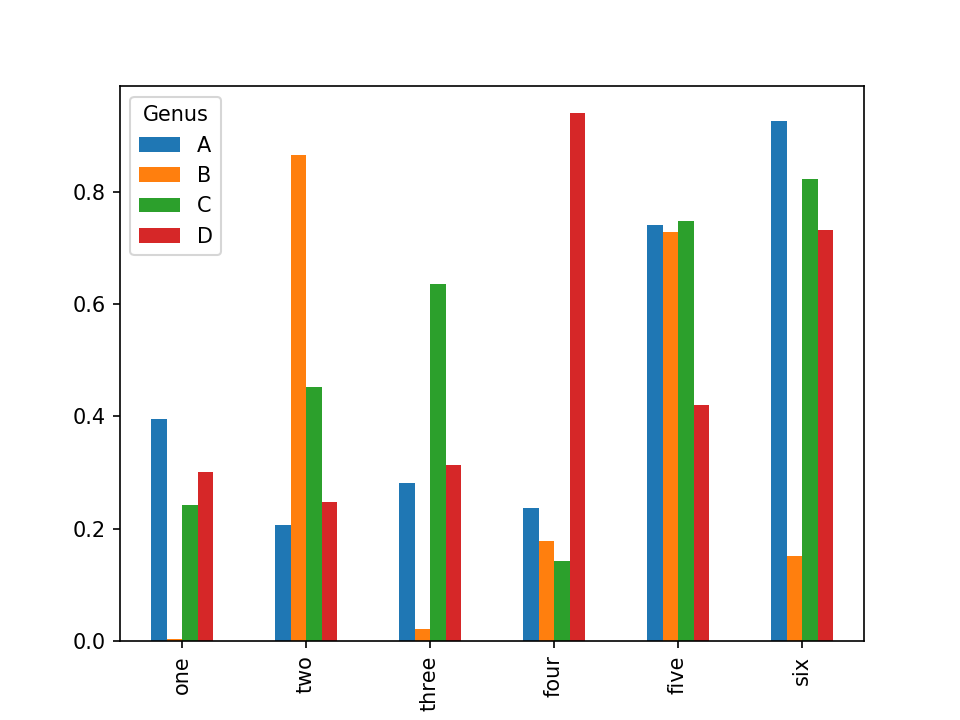

In [17]:
df.plot.bar()

Note that the name “Genus” on the DataFrame’s columns is used to title the legend.

We create stacked bar plots from a DataFrame by passing stacked=True, resulting in
the value in each row being stacked together.

<IPython.core.display.Javascript object>


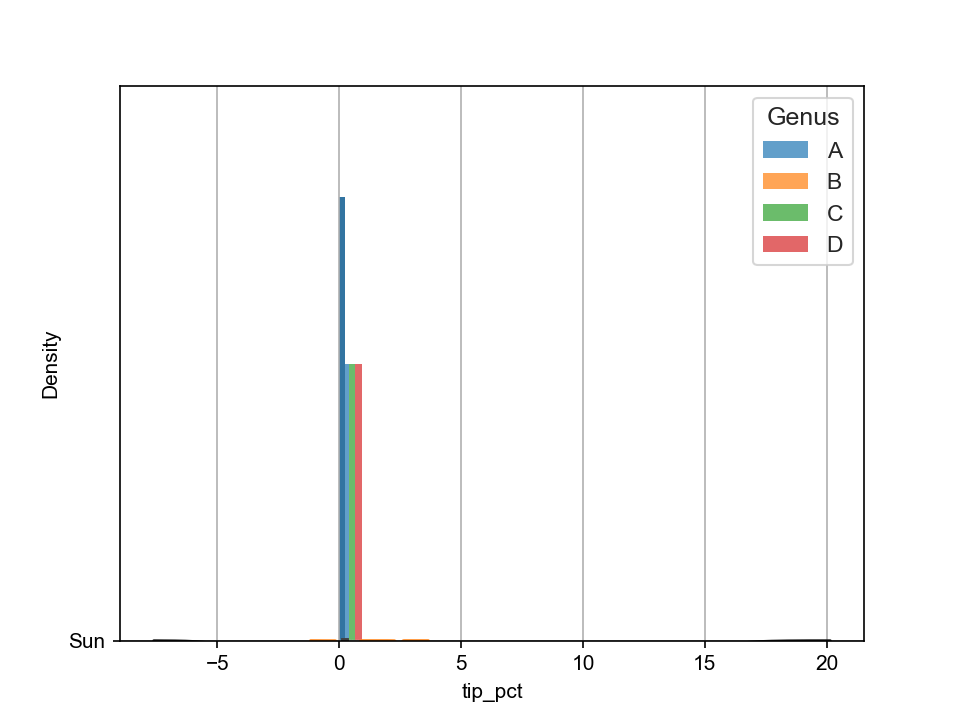

In [20]:
df.plot.barh(stacked=True, alpha=0.7)

A useful recipe for bar plots is to visualize a Series’s value frequency
using value_counts: 

    s.value_counts().plot.bar().

Returning to the tipping dataset used earlier in the book, suppose we wanted to make
a stacked bar plot showing the percentage of data points for each party size on each
day. I load the data using read_csv and make a cross-tabulation by day and party size:

In [22]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [23]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [24]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Then, normalize so that each row sums to 1 and make the plot.

In [25]:
# Normalize to sum to 1.
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


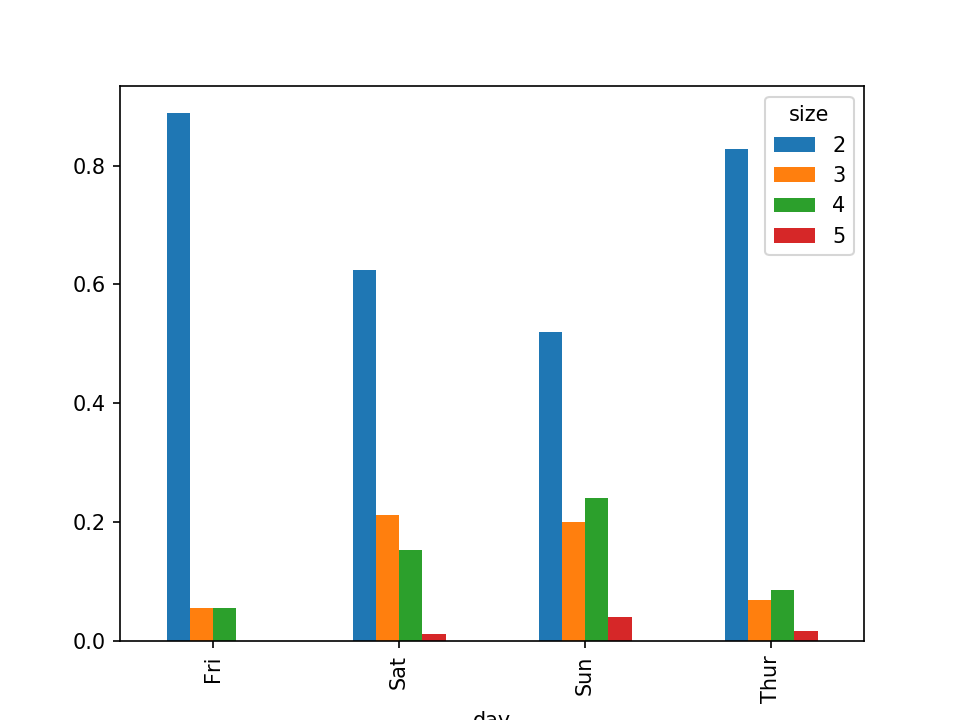

In [27]:
party_pcts.plot.bar()

So you can see that party sizes appear to increase on the weekend in this dataset.

With data that requires aggregation or summarization before making a plot, using the
seaborn package can make things much simpler. Let’s look now at the tipping percentage by day with seaborn.

In [28]:
import seaborn as sns

In [31]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [32]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [33]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


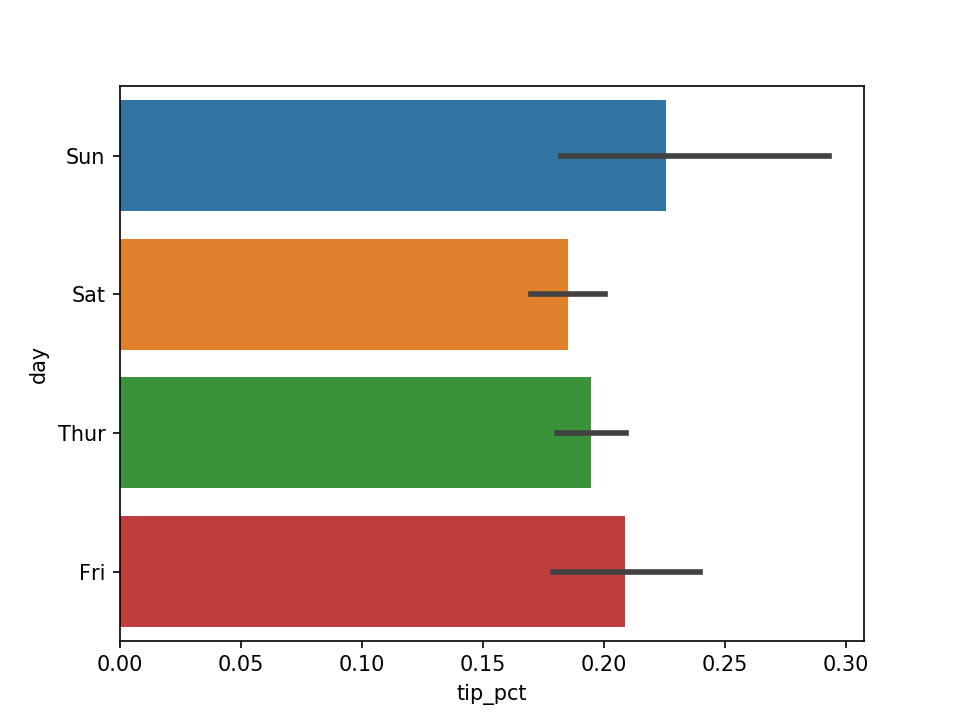

In [38]:
plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a data argument, which can be a pandas Data‐
Frame. The other arguments refer to column names. Because there are multiple
observations for each value in the day, the bars are the average value of tip_pct. The
black lines drawn on the bars represent the 95% confidence interval (this can be con‐
figured through optional arguments).

seaborn.barplot has a hue option that enables us to split by an additional categorical
value.

<IPython.core.display.Javascript object>


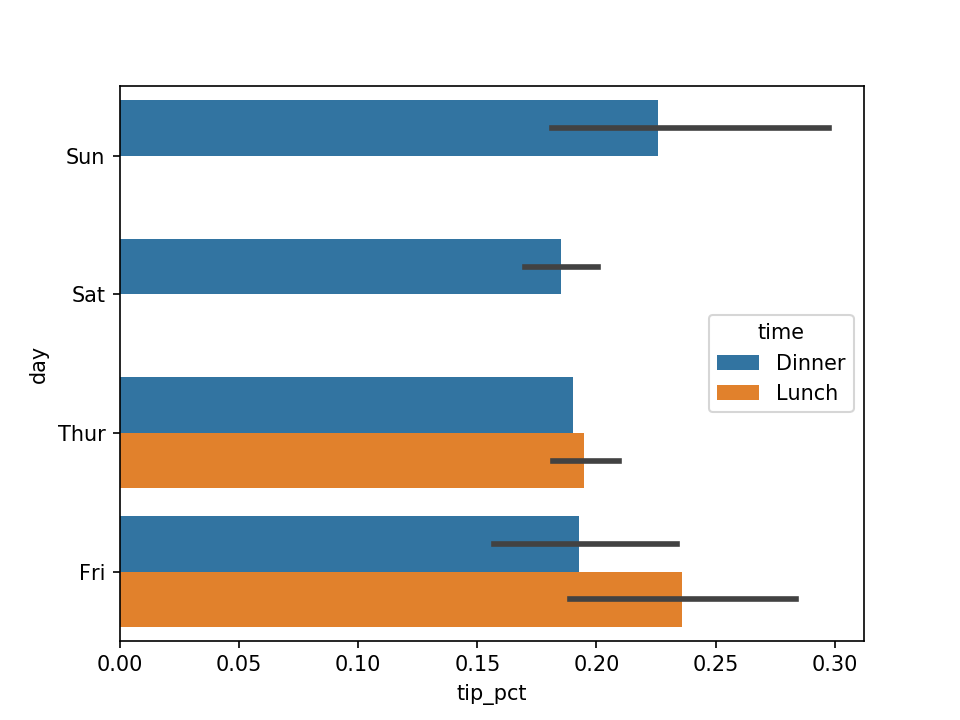

In [39]:
plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default
color palette, plot background, and grid line colors. You can switch between different
plot appearances using seaborn.set:

In [40]:
sns.set(style="whitegrid")

### Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data
points in each bin is plotted. Using the tipping data from before, we can make a histo‐
gram of tip percentages of the total bill using the plot.hist method on the Series.

In [42]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


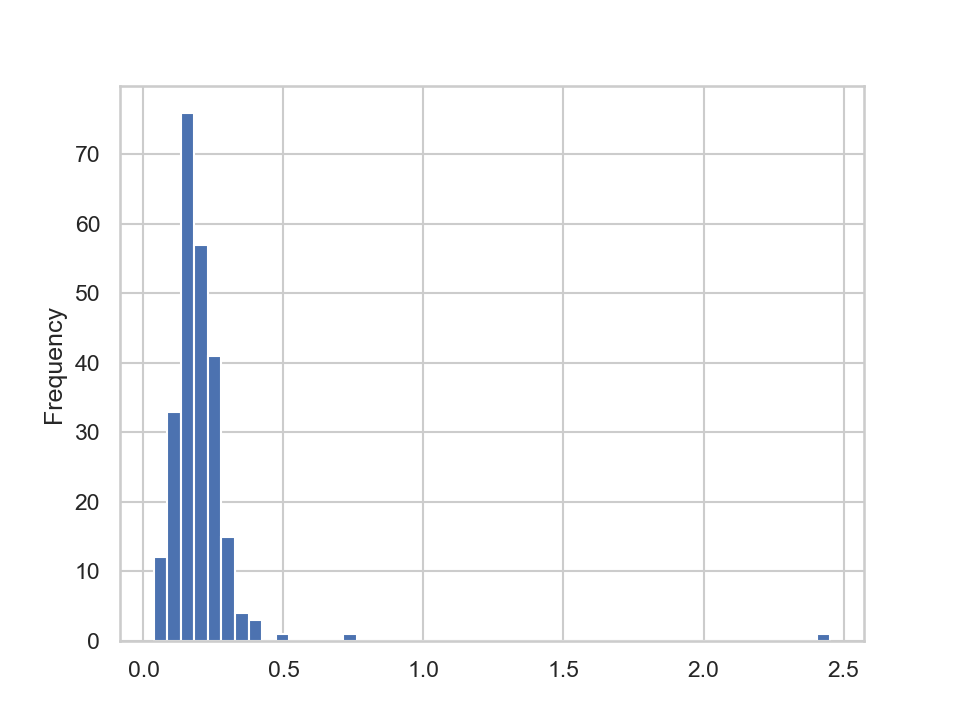

In [44]:
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. The
usual procedure is to approximate this distribution as a mixture of “kernels”—that is,
simpler distributions like the normal distribution. Thus, density plots are also known
as kernel density estimate (KDE) plots. Using plot.kde makes a density plot using
the conventional mixture-of-normals estimate.

<IPython.core.display.Javascript object>


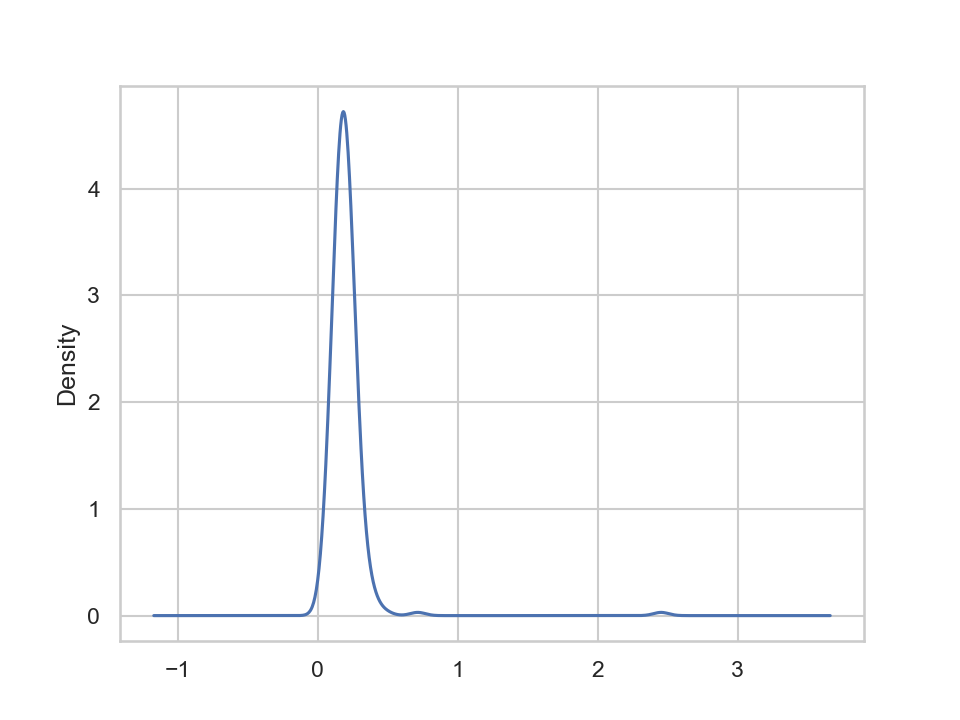

In [46]:
plt.figure()
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its distplot
method, which can plot both a histogram and a continuous density estimate simulta‐
neously. As an example, consider a bimodal distribution consisting of draws from
two different standard normal distributions.

<IPython.core.display.Javascript object>


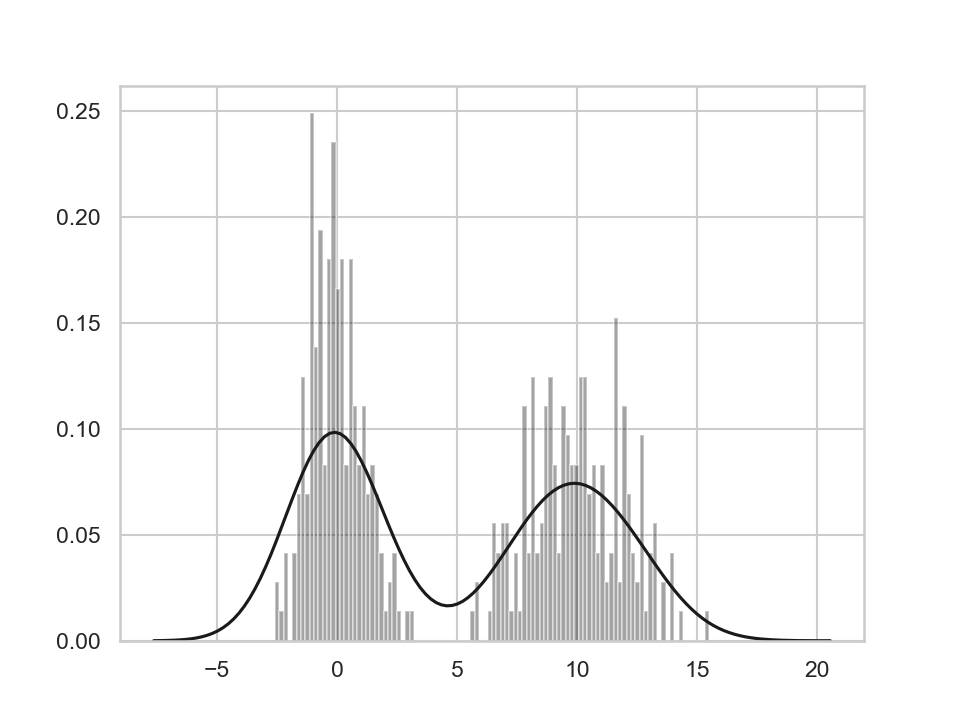

In [48]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)

values = pd.Series(np.concatenate([comp1,comp2]))

plt.figure()
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between
two one-dimensional data series. For example, here we load the macrodata dataset
from the statsmodels project, select a few variables, then compute log differences:

In [18]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [6]:
macro = pd.read_csv('examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [7]:
type(macro)

pandas.core.frame.DataFrame

In [12]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
trans_data = np.log(data).diff().dropna()

In [16]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


We can then use seaborn’s regplot method, which makes a scatter plot and fits a lin‐
ear regression line.

<IPython.core.display.Javascript object>


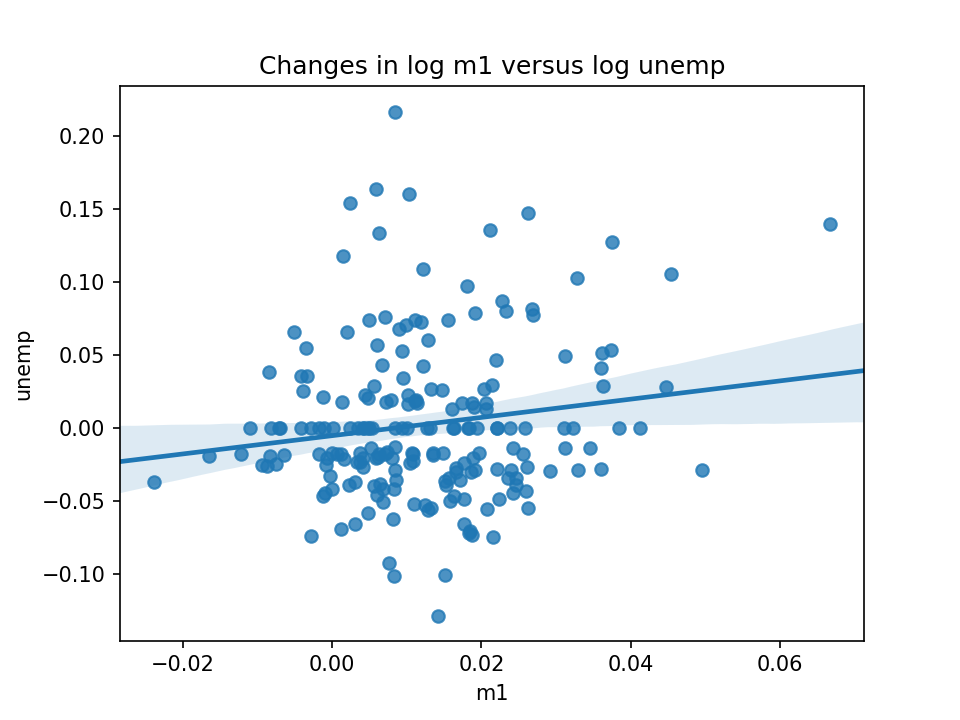

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [19]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so seaborn has a convenient pairplot function,
which supports placing histograms or density estimates of each variable along the
diagonal.

<IPython.core.display.Javascript object>


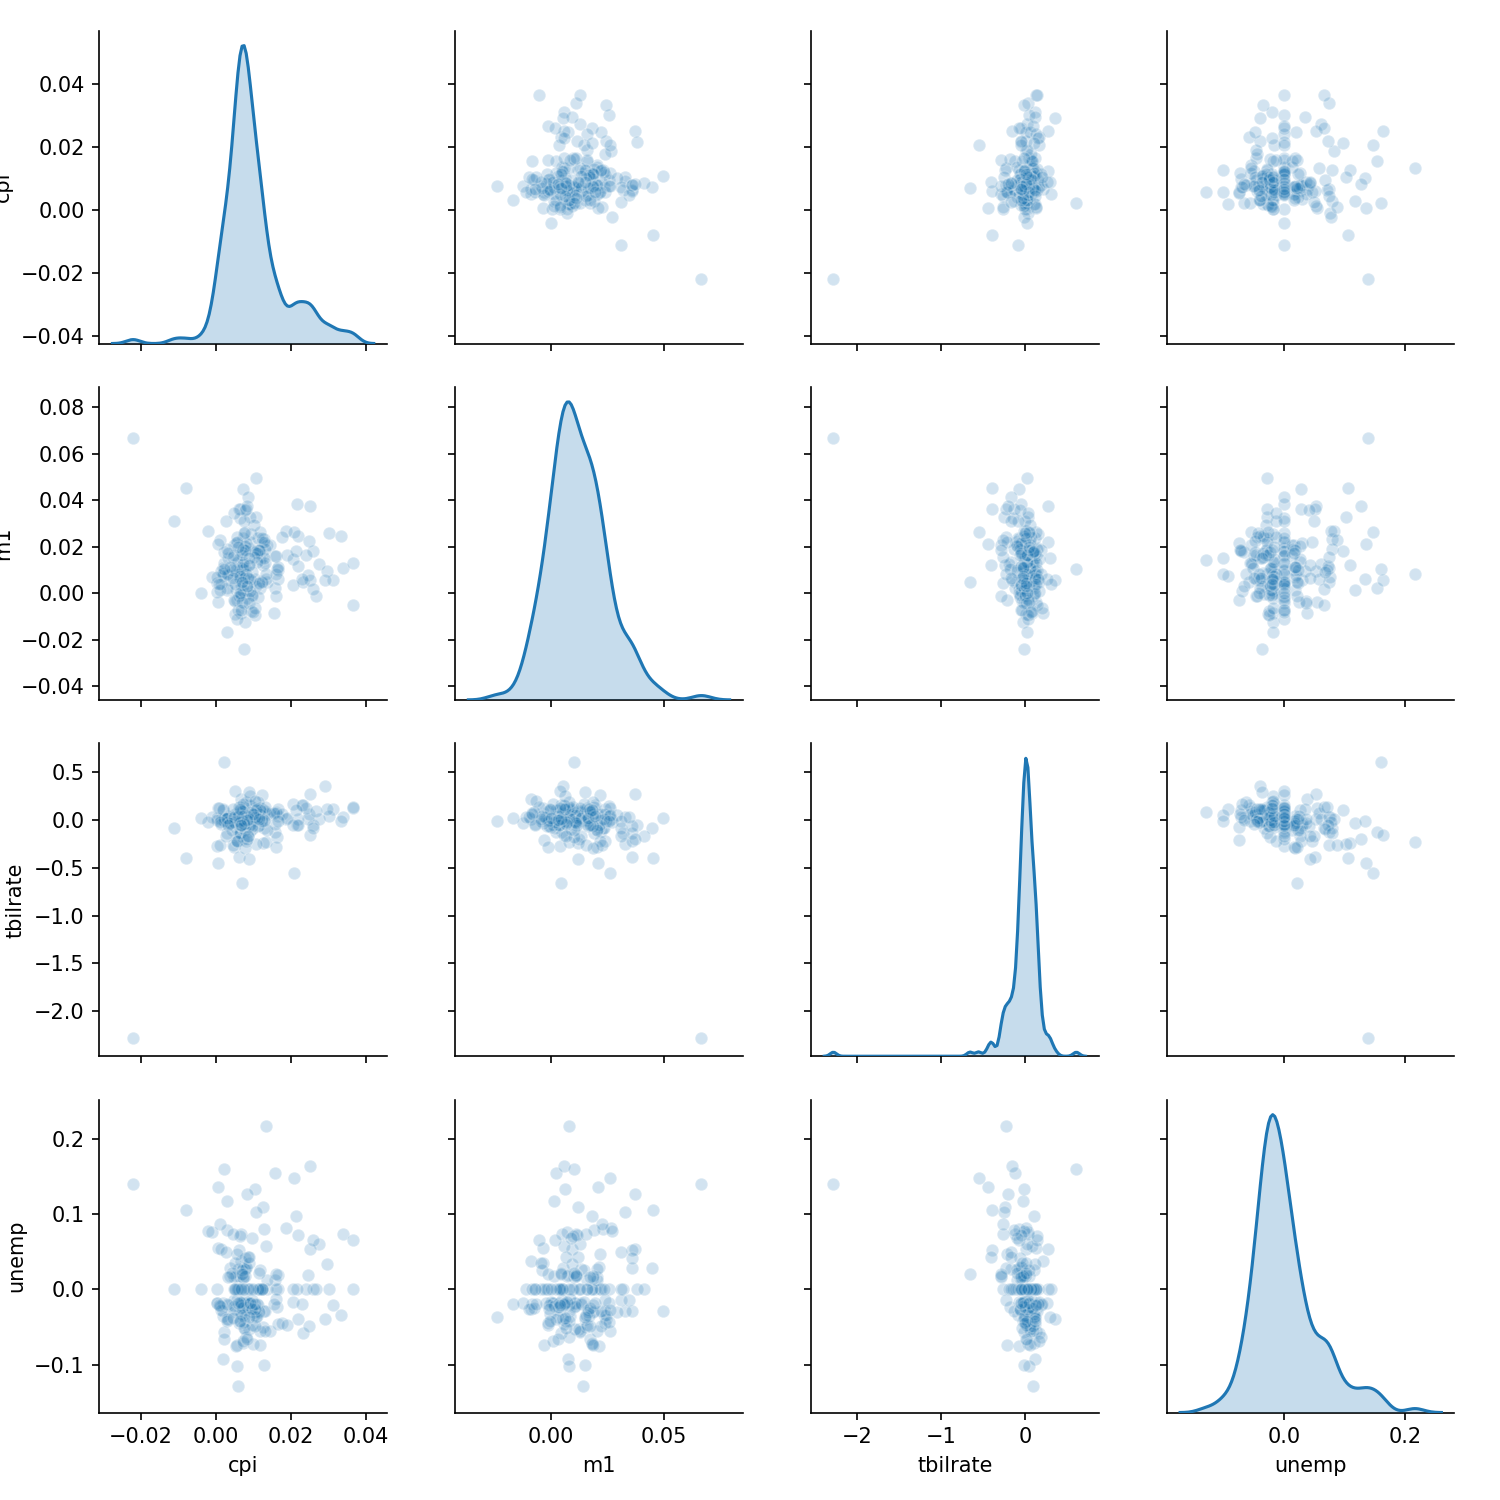

In [27]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

You may notice the plot_kws argument. This enables us to pass down configuration
options to the individual plotting calls on the off-diagonal elements. Check out the
seaborn.pairplot docstring for more granular configuration options.

### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to vis‐
ualize data with many categorical variables is to use a facet grid. Seaborn has a useful
built-in function factorplot that simplifies making many kinds of faceted plots.

In [22]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


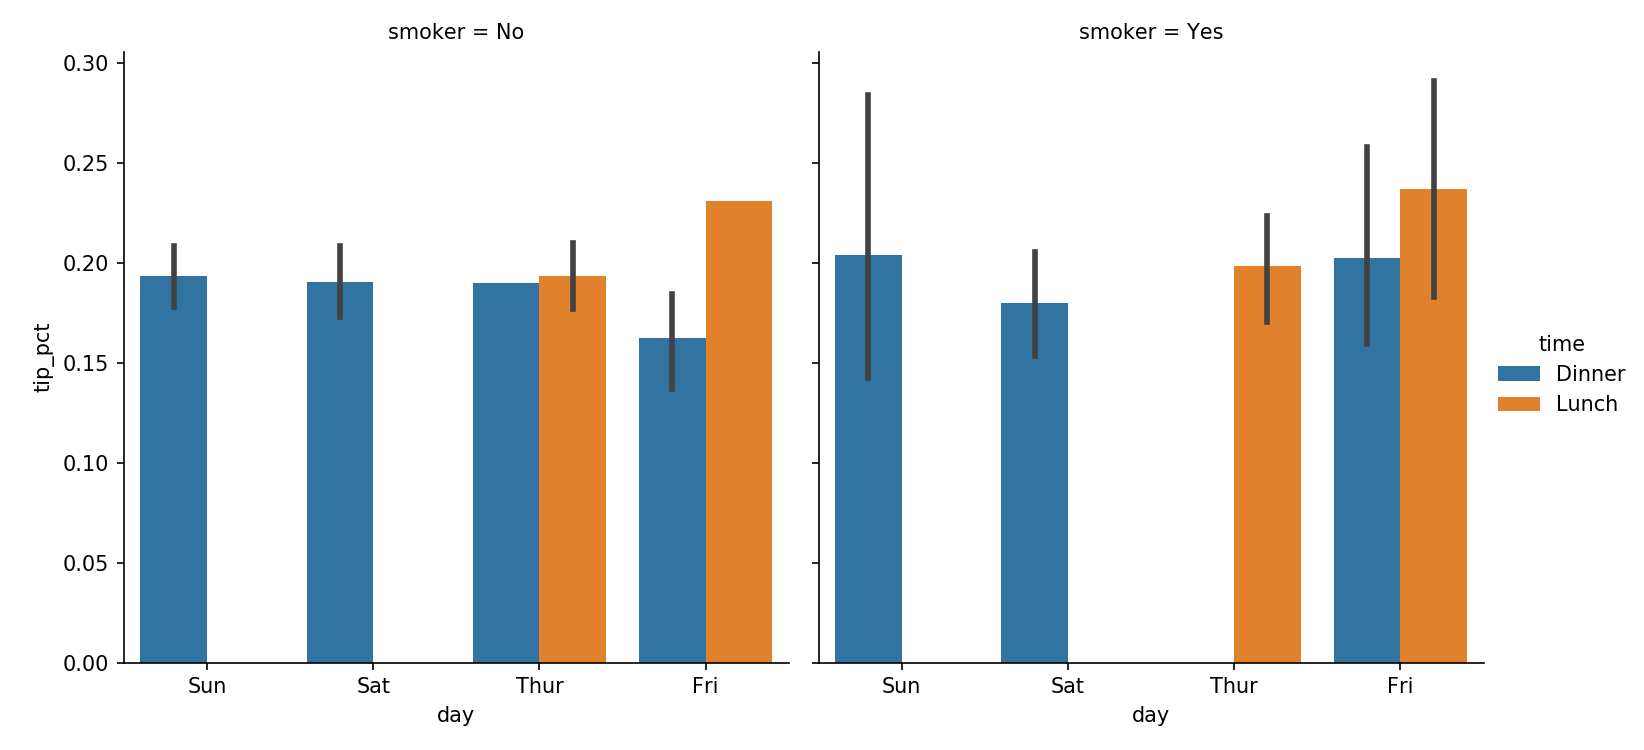

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

Instead of grouping by 'time' by different bar colors within a facet, we can also
expand the facet grid by adding one row per time value.

<IPython.core.display.Javascript object>


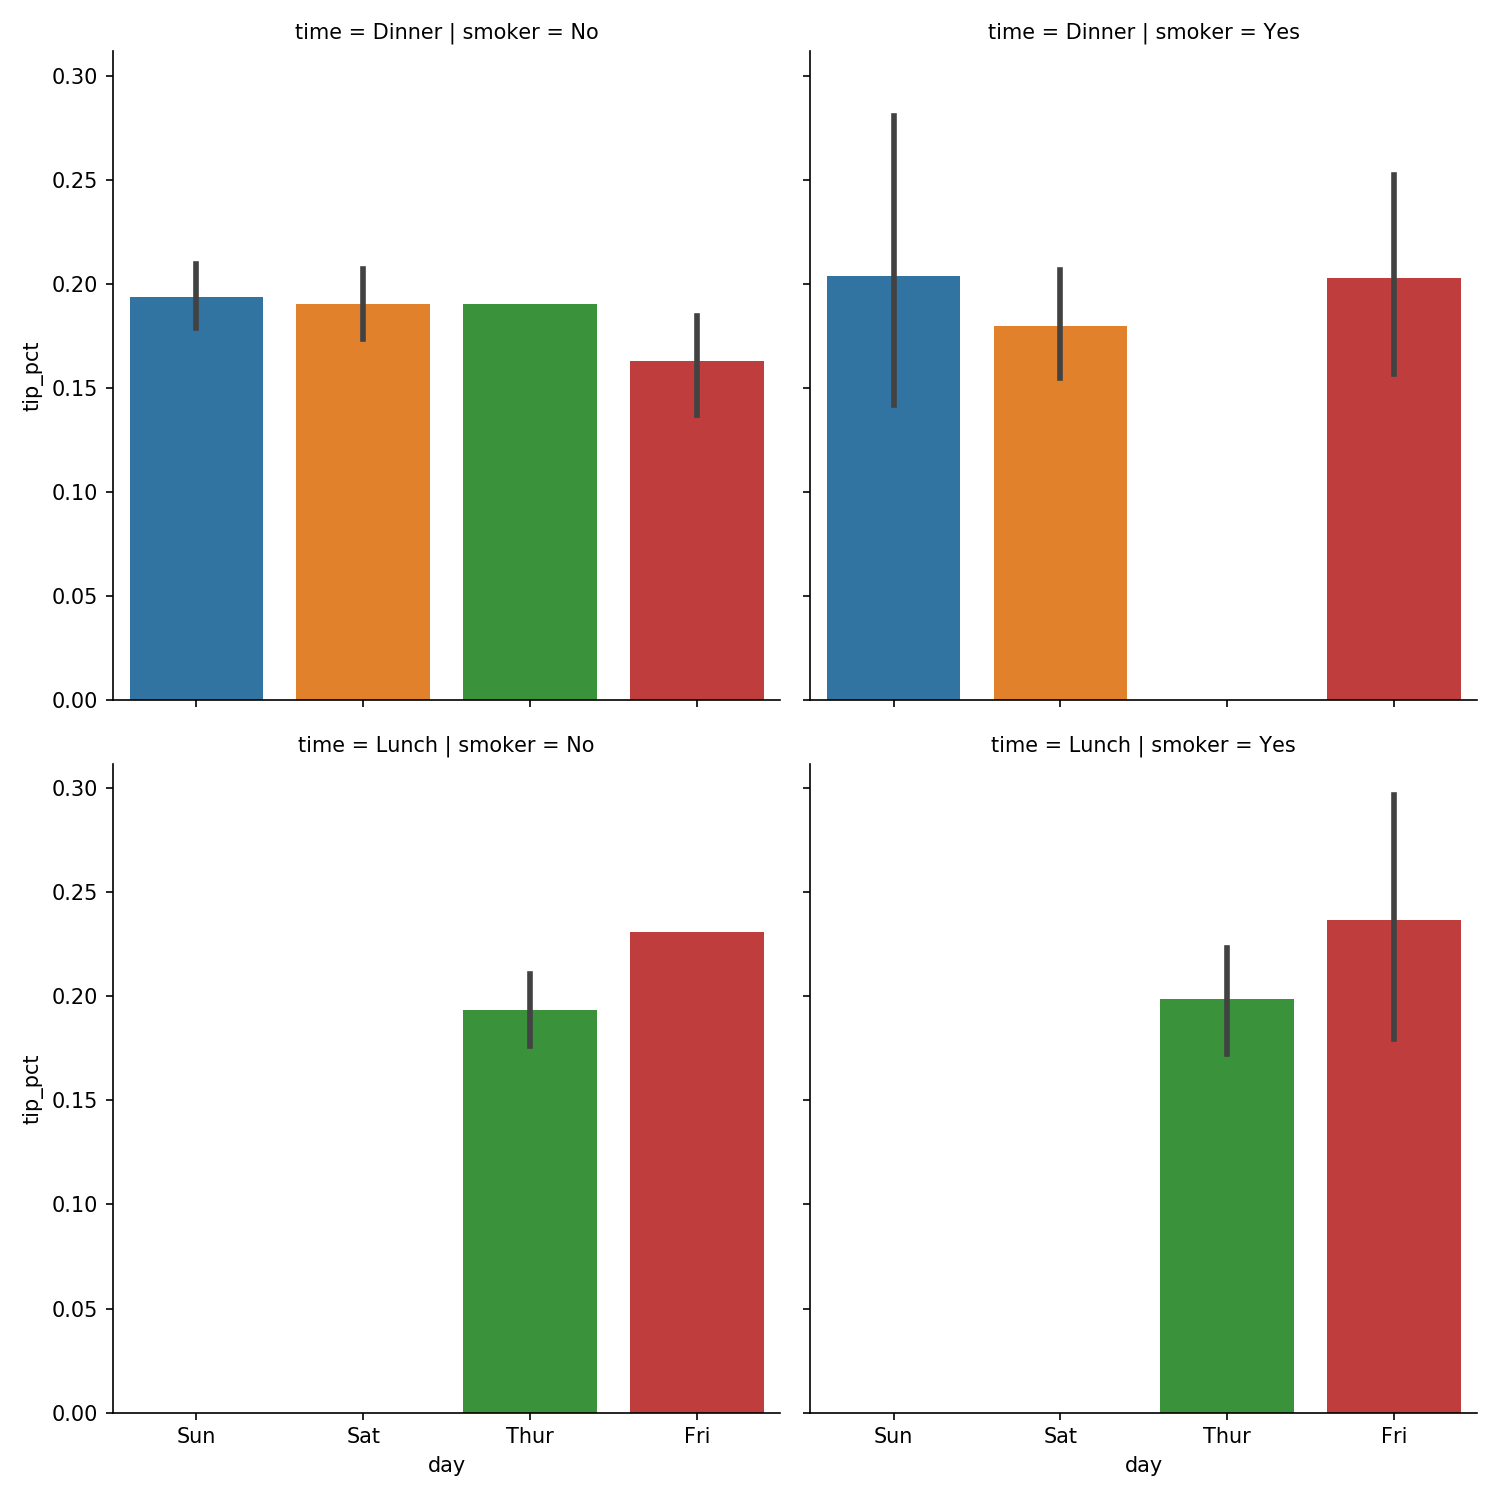

In [28]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

factorplot supports other plot types that may be useful depending on what you are
trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type.

<IPython.core.display.Javascript object>


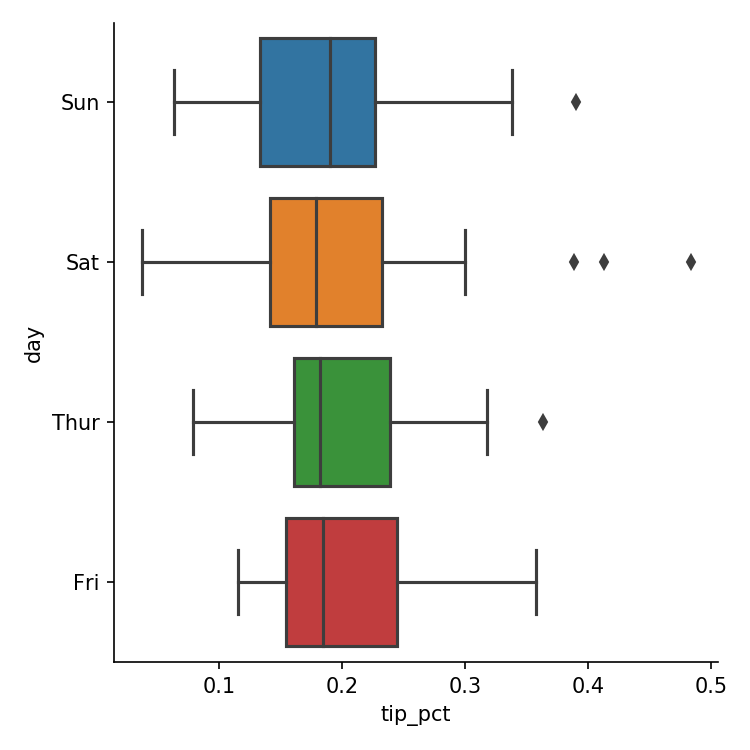

In [29]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

You can create your own facet grid plots using the more general seaborn.FacetGrid
class. See the seaborn documentation for more.

## 9.3 Other Python Visualization Tools

As is common with open source, there are a plethora of options for creating graphics
in Python (too many to list). Since 2010, much development effort has been focused
on creating interactive graphics for publication on the web. With tools like Bokeh and
Plotly, it’s now possible to specify dynamic, interactive graphics in Python that are
destined for a web browser.

For creating static graphics for print or web, I recommend defaulting to matplotlib
and add-on libraries like pandas and seaborn for your needs. For other data visualiza‐
tion requirements, it may be useful to learn one of the other available tools out there.
I encourage you to explore the ecosystem as it continues to involve and innovate into
the future.

## 9.4 Conclusion

The goal of this chapter was to get your feet wet with some basic data visualization
using pandas, matplotlib, and seaborn. If visually communicating the results of data
analysis is important in your work, I encourage you to seek out resources to learn
more about effective data visualization. It is an active field of research and you can
practice with many excellent learning resources available online and in print form.

In the next chapter, we turn our attention to data aggregation and group operations
with pandas.